In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
StudentsPerformance_original = pd.read_csv('C:\\programmer_shit\\data_salo_files\\StudentsPerformance.csv')
StudentsPerformance_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
StudentsPerformance = pd.get_dummies(StudentsPerformance_original)
StudentsPerformance


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [5]:
X = StudentsPerformance.drop(["gender_female" , "lunch_standard" , "test preparation course_none" ] , axis = 1)

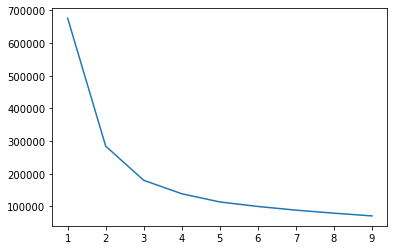

In [7]:
from sklearn.cluster import KMeans
k = range(1,10)
models = [KMeans(n_clusters = i, random_state = 42).fit(X) for i in k]
dist = [m.inertia_ for m in models]

plt.plot(k, dist)

In [16]:
models[2].inertia_

138622.7420193687

In [21]:
X["cluster"] = models[2].labels_

X.groupby('cluster').mean()

,math score,reading score,writing score,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
cluster,,,,,,,,,,,,,,,,,
0,65.357303,68.523596,67.847191,0.474157,0.085393,0.188764,0.325843,0.276404,0.123596,0.202247,0.125843,0.208989,0.051685,0.249438,0.161798,0.328090,0.346067
1,81.794118,85.160131,84.277778,0.411765,0.058824,0.173203,0.294118,0.271242,0.202614,0.258170,0.140523,0.111111,0.091503,0.235294,0.163399,0.228758,0.500000
2,48.096386,50.670683,48.485944,0.582329,0.132530,0.212851,0.337349,0.224900,0.092369,0.212851,0.076305,0.277108,0.032129,0.172691,0.228916,0.558233,0.204819


In [22]:
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster

link = linkage(X)
link

array([[4.52000000e+02, 6.13000000e+02, 1.00000000e+00, 2.00000000e+00],
       [8.39000000e+02, 1.00000000e+03, 1.41421356e+00, 3.00000000e+00],
       [1.69000000e+02, 9.30000000e+02, 1.41421356e+00, 2.00000000e+00],
       ...,
       [3.71000000e+02, 1.99500000e+03, 7.68114575e+00, 9.98000000e+02],
       [9.80000000e+02, 1.99600000e+03, 1.38202750e+01, 9.99000000e+02],
       [5.90000000e+01, 1.99700000e+03, 1.69115345e+01, 1.00000000e+03]])

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [345.0, 345.0, 355.0, 355.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [435.0, 435.0, 445.0, 445.0],
  [425.0, 425.0, 440.0, 440.0],
  [415.0, 415.0, 432.5, 432.5],
  [465.0, 465.0, 475.0, 475.0],
  [455.0, 455.0, 470.0, 470.0],
  [423.75, 423.75, 462.5, 462.5],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [505.0, 505.0, 522.5, 522.5],
  [495.0, 495.0, 513.75, 513.75],
  [485.0, 485.0, 504.375, 504.375],
  [443.125, 443.125, 494.6875, 494.6875],
  [405.0, 405.0, 468.90625, 468.90625],
  [382.5, 382.5, 436.953125, 436.953125],
  [365.0, 365.0, 409.7265625, 409.7265625],
  [545.0, 545.0, 555.0, 555.0],
  [387.36328125, 387.36328125, 550.0, 550.0],
  [575.0, 575.0, 585.0, 585.0],
  [605.0, 605.0, 615.0, 615.0],
  [595.0, 595.0, 610.0, 610.0],
  [675.0, 675.0, 685.0, 685.0],
  [705.0, 70

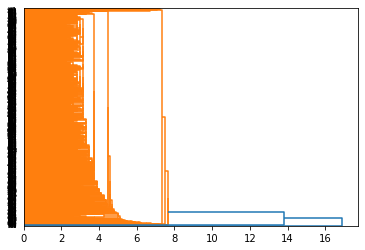

In [23]:
dn = dendrogram(link , orientation='right')
dn